<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/capm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capital Asset Pricing Model (CAPM)**

Capital Asset Pricing Model (CAPM) optimizes portfolio returns based on the relationship between market risk and individual asset risk.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Alpha (Intercept): 0.0025715059701091345
Beta (Slope): 1.1962611480892313


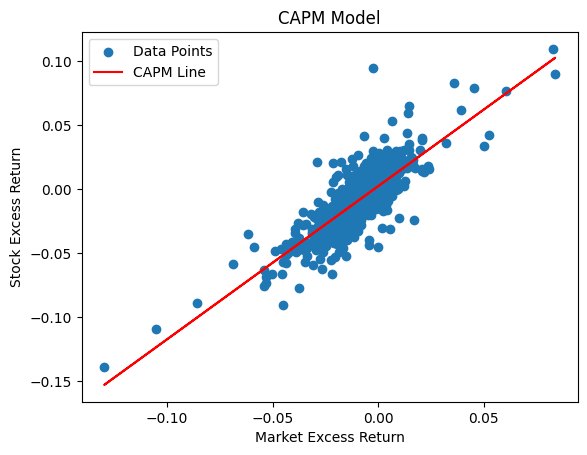

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data and market index data (e.g., S&P 500)
stock = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
market = yf.download('^GSPC', start='2020-01-01', end='2023-01-01')  # S&P 500 index

# Calculate daily returns
stock['Returns'] = stock['Adj Close'].pct_change().dropna()
market['Market_Returns'] = market['Adj Close'].pct_change().dropna()

# Drop missing values due to difference in trading days
data = pd.merge(stock[['Returns']], market[['Market_Returns']], left_index=True, right_index=True).dropna()

# Run linear regression (CAPM formula: Expected Return = Rf + Beta * (Market Return - Rf))
# Rf is the risk-free rate (assume 0.01 or 1%)
risk_free_rate = 0.01

# X is excess market returns
X = data['Market_Returns'] - risk_free_rate

# Y is excess stock returns
Y = data['Returns'] - risk_free_rate

# Use numpy to calculate beta
beta, alpha = np.polyfit(X, Y, 1)

# Display the results
print(f"Alpha (Intercept): {alpha}")
print(f"Beta (Slope): {beta}")

# Plot the regression line
plt.scatter(X, Y, label='Data Points')
plt.plot(X, alpha + beta * X, color='red', label='CAPM Line')
plt.title('CAPM Model')
plt.xlabel('Market Excess Return')
plt.ylabel('Stock Excess Return')
plt.legend()
plt.show()

The Beta represents the stock's sensitivity to market movements, while Alpha represents the stock's expected return independent of market movement.